[View in Colaboratory](https://colab.research.google.com/github/yooseonghwan/OpenDataWrangling/blob/master/03_word2vec%EC%9C%BC%EB%A1%9C_%EB%8B%A8%EC%96%B4%EC%9C%A0%EC%82%AC%EB%8F%84_%EB%B3%B4%EA%B8%B0_teacher.ipynb)

# 특정 키워드로 word2Vec 단어 유사도 보기


## Word2Vec(Word Embedding to Vector)

컴퓨터는 숫자만 인식할 수 있고 한글, 이미지는 바이너리 코드로 저장 됩니다.

* one hot encoding(예 [0000001000]) 혹은 Bag of Word에서 vector size가 매우 크고 sparse 하므로 neural net 성능이 잘 나오지 않습니다.
* `주위 단어가 비슷하면 해당 단어의 의미는 유사하다` 라는 아이디어
* 단어를 트레이닝 시킬 때 주위 단어를 label로 매치하여 최적화
* 단어를 `의미를 내포한 dense vector`로 매칭 시키는 것

* Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 봅니다. 
* 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해합니다.

![word2vec](https://1.bp.blogspot.com/-Q7F8ulD6fC0/UgvnVCSGmXI/AAAAAAAAAbg/MCWLTYBufhs/s1600/image00.gif)
이미지 출처 : https://opensource.googleblog.com/2013/08/learning-meaning-behind-words.html

* 단어의 임베딩과정을 실시간으로 시각화 : [word embedding visual inspector](https://ronxin.github.io/wevi/)


![CBOW와 Skip-Gram](https://i.imgur.com/yXY1LxV.png)
출처 : https://arxiv.org/pdf/1301.3781.pdf
 Tomas Mikolov, Ilya Sutskever, Kai Chen, Greg Corrado, and Jeffrey Dean. Distributed Representations of Words and Phrases and their Compositionality. In Proceedings of NIPS, 2013.


* CBOW와 Skip-Gram기법이 있다.

    * CBOW(continuous bag-of-words)는 전체 텍스트로 하나의 단어를 예측하기 때문에 작은 데이터셋일 수록 유리하다.    
    * 아래 예제에서 __ 에 들어갈 단어를 예측한다.
<pre>
1) __가 맛있다. 
2) __를 타는 것이 재미있다. 
3) 평소보다 두 __로 많이 먹어서 __가 아프다.
</pre>

    * Skip-Gram은 타겟 단어들로부터 원본 단어를 역으로 예측하는 것이다. CBOW와는 반대로 컨텍스트-타겟 쌍을 새로운 발견으로 처리하고 큰 규모의 데이터셋을 가질 때 유리하다.
    * `배`라는 단어 주변에 올 수 있는 단어를 예측한다.
    
    <pre>
    1) *배*가 맛있다. 
    2) *배*를 타는 것이 재미있다. 
    3) 평소보다 두 *배*로 많이 먹어서 *배*가 아프다.
    </pre>



## Word2Vec 참고자료
* [word2vec 모델 · 텐서플로우 문서 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec으로 문장 분류하기 · ratsgo's blog](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
* [CS224n: Natural Language Processing with Deep Learning](http://web.stanford.edu/class/cs224n/syllabus.html)
* [Word2Vec Tutorial - The Skip-Gram Model · Chris McCormick](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)

### 논문
* [Efficient Estimation of Word Representations in
Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)

## Gensim

* [gensim: models.word2vec – Deep learning with word2vec](https://radimrehurek.com/gensim/models/word2vec.html)
* [gensim: Tutorials](https://radimrehurek.com/gensim/tutorial.html)
* [한국어와 NLTK, Gensim의 만남 - PyCon Korea 2015](https://www.lucypark.kr/docs/2015-pyconkr/)


In [1]:
!pip install soynlp
!pip show soynlp

Name: soynlp
Version: 0.0.46
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, psutil
Required-by: 


In [2]:
!pip install gensim
!pip show gensim

    100% |████████████████████████████████| 23.5MB 1.7MB/s 
    100% |████████████████████████████████| 1.4MB 8.7MB/s 
    100% |████████████████████████████████| 133kB 26.6MB/s 
    100% |████████████████████████████████| 61kB 22.8MB/s 
    100% |████████████████████████████████| 4.5MB 7.2MB/s 
    100% |████████████████████████████████| 552kB 23.5MB/s 
  Running setup.py bdist_wheel for smart-open ... - done
  Stored in directory: /content/.cache/pip/wheels/73/f1/9b/ccf93d4ba073b6f79b1ed9df68ab5ce048d8136d0efcf90b30
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /content/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file
Name: gensim
Version: 3.5.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, sc

In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 데이터 로드하기
*  데이터 출처 : https://github.com/akngs/petitions

In [0]:
# 드라이브 폴더에 있는 petition.csv를 업로드 합니다. 01 국민청원 분석 및 시각화 에서 이미 해주었다면 다시 해줄 필요는 없습니다.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [6]:
# petition.csv 파일이 보이지 않는다면 위 셀의 주석을 풀고 해당 파일을 업로드 합니다.
%ls

전국_평균_분양가격_2018.6월_.csv  petition.csv
datalab@                                           sample_data/


In [0]:
df = pd.read_csv('petition.csv', parse_dates=['start', 'end'])

In [8]:
# 관심사별로 텍스트 데이터를 학습시키기 위한 목적도 있지만 전체 텍스트를 돌렸을 때 빠르게 결과를 얻기 위해서 샘플링 하려는 의도도 있습니다.
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
finance.shape

(10447, 8)

In [9]:
finance.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
100,124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [10]:
finance.tail()

,article_id,start,end,answered,votes,category,title,content
210319,271647,2018-06-15,2018-07-15,0,342,행정,법치국가 근간 흔드는 김상조 공정거래위원장을 해임해주십시요.,"김상조 해임 건의안, 청와대국민참여 동참부탁드립니다.\n6월15일은 오늘 하루만 공..."
210340,271671,2018-06-15,2018-07-15,0,189,정치개혁,김상조 공정위장의 탈법적인 행위에 대한 해명과 시정조치을 요구합니다.,공정거래 위원장은 가장 자유롭고 공정한 경쟁을 할 수 있는 경제환경을 조성해야 의...
210355,271690,2018-06-15,2018-07-15,0,46,인권/성평등,"몰래카메라(음성녹음),리벤지포르노 처벌을 강화해주세요.",수요가 있으니 공급이 있다는 말이 있습니다.\n피해자는 증거를 캡쳐하고 캡쳐하면서 ...
210391,271734,2018-06-15,2018-07-15,0,0,기타,사건발생기 배상금과 합의금을 범인이 무슨수를써서라고 갚게해주세요,사기를 당할시 범인이적발되어 검거를당해도 돈을 다시 돌려줄 방법이없으면 그냥 감옥에...
210418,271762,2018-06-15,2018-07-15,0,2,행정,종부세 관련하여 재정위원회에 고함,부동산 공시가격이 실거래가보다 크게 낮을 수 밖에 없는 이유\n공시가격을 시세보다 ...


In [0]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 11

In [12]:
sample_title = finance['title'][sample_index]
sample_title

'소액주주 보호를 위해 조사요청 드립니다.'

In [13]:
sample_content = finance['content'][sample_index]
sample_content

'존경하는 대통령님께,\\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이사의 기이한 행동에 의하여 감사의견 거절이 나와 상장 폐지를 앞두고 있습니다.\\n주주들이 모여 장** 대표를 규탄해야할 이때 거래소 금감원 신한회계법인 의 잘못이라고 주장하며 많은 소액주주들을 이끌고 있는 중국원양자원의 한국인 사외이사 김**과 관련자들의 조사를 원합니다.\\n그들은 감사의견 거절 의견 나오기 직전 주주총회에서 장** 대표와 소통이 잘되고 있고 회사는 감사준비를 잘했다. 앞으로 실적이 좋아질것이다. 라고 말하며 (자본시장에 관련법률 위반) 비리에 얼룩진걸로 보이는 (현재 증선위 고발로 검찰조사중임) 장** 대표를 연임시키면서 본인들은 스톡옵션 이라는 거대한 이익을 취하였습니다\\n대규모적자상태에서 스톡옵션을 부여한다는 쉽게 납득할수 없는 일들을 관철시키는 과정에서\\n회사 실적이 좋아질거다 감사준비 잘했다 등\\n사외이사 지위를 이용하여 선취한 회사내부의 정보를 주주모임 대표라는 지위를 이용하여 악용한것으로 보여집니다.\\n또한 반대의견을 보이는 주주들을 모두 주주모임 카페에서 강퇴시키는등 여론을 조작하여 시세교란 행위를 유도하였다고 생각됩니다.\\n현재는 신한회계를 소송하는 명분으로 주주들에게 수억원의 돈을 모금후 사용처를 밝히지 않고 있으나,\\n다른 대안이 없는 소액주주들은 아무말 못하고\\n끌려다니며,\\n누군가가 시키는 단체행동들을 하고있습니다.\\n부디 2만5천의 주주들을 위하여 김** 사외이사와 관련자들을 꼭 조사해주시기 바랍니다\\n*본글은 조사를 요청하는 글이지 누군가를 비방하는 글이 아님을 밝힙니다. 혹시 조사전 개인에게 피해가 갈까하여 이름은 가렸습니다.'

# 텍스트 데이터 전처리 

In [0]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [15]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'존경하는 대통령님께  코스피 주식종목 중국 원양자원은 현재 계속되는 장   대표이사의 기이한 행동에 의하여 감사의견 거절이 나와 상장 폐지를 앞두고 있습니다  주주들이 모여 장   대표를 규탄해야할 이때 거래소 금감원 신한회계법인 의 잘못이라고 주장하며 많은 소액주주들을 이끌고 있는 중국원양자원의 한국인 사외이사 김  과 관련자들의 조사를 원합니다  그들은 감사의견 거절 의견 나오기 직전 주주총회에서 장   대표와 소통이 잘되고 있고 회사는 감사준비를 잘했다  앞으로 실적이 좋아질것이다  라고 말하며  자본시장에 관련법률 위반  비리에 얼룩진걸로 보이는  현재 증선위 고발로 검찰조사중임  장   대표를 연임시키면서 본인들은 스톡옵션 이라는 거대한 이익을 취하였습니다 대규모적자상태에서 스톡옵션을 부여한다는 쉽게 납득할수 없는 일들을 관철시키는 과정에서 회사 실적이 좋아질거다 감사준비 잘했다 등 사외이사 지위를 이용하여 선취한 회사내부의 정보를 주주모임 대표라는 지위를 이용하여 악용한것으로 보여집니다  또한 반대의견을 보이는 주주들을 모두 주주모임 카페에서 강퇴시키는등 여론을 조작하여 시세교란 행위를 유도하였다고 생각됩니다  현재는 신한회계를 소송하는 명분으로 주주들에게 수억원의 돈을 모금후 사용처를 밝히지 않고 있으나  다른 대안이 없는 소액주주들은 아무말 못하고 끌려다니며  누군가가 시키는 단체행동들을 하고있습니다  부디  만 천의 주주들을 위하여 김   사외이사와 관련자들을 꼭 조사해주시기 바랍니다  본글은 조사를 요청하는 글이지 누군가를 비방하는 글이 아님을 밝힙니다  혹시 조사전 개인에게 피해가 갈까하여 이름은 가렸습니다 '

In [16]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = finance['content'].apply(preprocessing)

CPU times: user 628 ms, sys: 23.8 ms, total: 652 ms
Wall time: 653 ms


# soynlp를 사용해 토큰화

## 텍스트 데이터 전처리 이해하기

(출처 : [트위터 한국어 형태소 분석기](https://github.com/twitter/twitter-korean-text))

**정규화 normalization (입니닼ㅋㅋ -> 입니다 ㅋㅋ, 샤릉해 -> 사랑해)**

* 한국어를 처리하는 예시입니닼ㅋㅋㅋㅋㅋ -> 한국어를 처리하는 예시입니다 ㅋㅋ

**토큰화 tokenization**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하는Verb, 예시Noun, 입Adjective, 니다Eomi ㅋㅋKoreanParticle

**어근화 stemming (입니다 -> 이다)**

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어Noun, 를Josa, 처리Noun, 하다Verb, 예시Noun, 이다Adjective, ㅋㅋKoreanParticle


**어구 추출 phrase extraction** 

* 한국어를 처리하는 예시입니다 ㅋㅋ -> 한국어, 처리, 예시, 처리하는 예시

Introductory Presentation: [Google Slides](https://docs.google.com/presentation/d/10CZj8ry03oCk_Jqw879HFELzOLjJZ0EOi4KJbtRSIeU/)

In [17]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [18]:
# 전처리 이전의 샘플 텍스트로 토큰화
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['소액주주', '보호를', '위해', '조사요청', '드립니다', '.']

In [20]:
# 전처리 이후의 샘플 텍스트로 토큰화
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['존경하는', '대통령님께', '코스피', '주식종목', '중국', '원양자원은', '현재', '계속되는', '장', '대표이사의']

In [21]:
print(len(tokened_title))
print(len(tokened_content))

6
174


In [23]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:]

CPU times: user 13.9 s, sys: 187 ms, total: 14.1 s
Wall time: 14.1 s


7         [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
11        [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
54        [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
68        [존경하는, 문제인, 대통령님께, 먼저, 어렵고, 힘든, 국정운영을, 이끄시느라, ...
100       [안녕하십니까, 최근, 뉴스에, 주목을, 못, 받는, 뉴스가, 있습니다, 아시아경제...
102       [대통령님, 취임, 이후, 어려운, 상황, 속에서도, 원만한, 국정, 운영을, 해,...
107       [대초반이며서울전세살고, 인가족이며, 근로소득자입니다, 이번에, 청약으로, 서울, ...
118       [실수요자가, 생애최초로, 주택을, 구입할, 때, 받을, 수, 있는, 디딤돌대출의,...
131       [점점, 살기힘들어지는, 세상인것같습니다, 물가는, 하루가, 멀다하고, 오르고있는데...
132       [안녕하세요, 저는, 힘, 없는, 개인을, 대상으로, 마땅히, 지급해야, 할, 보험...
134       [안녕하세요, 저는, 힘, 없는, 개인을, 대상으로, 마땅히, 지급해야, 할, 보험...
146       [안녕하세요, 국책은행인, 기업은행에서, 아래, 링크와, 같이, 근, 년간, 제가,...
169       [수많은, 임대인중, 한사람으로써, 금번, 부동산대책으로, 인한, 큰, 피해를, 보...
174       [금번, 김현아, 국토교통부장관께서, 발표한, 부동산, 대책, 관련입니다, 우선, ...
192       [문제인, 대통령님, 대통령님, 안녕하세요, 저는, 년, 월, 일생, 김도윤입니다,...
196       [또다시, 합병으로, 어머니를, 모시고, 차병원에, 입원을, 해야합니다, 보행중, ...
214       [주, SGI, 와, 폐사는, 피보험자를, 인천세관으로

In [24]:
tokens[sample_index][:10]

['존경하는', '대통령님께', '코스피', '주식종목', '중국', '원양자원은', '현재', '계속되는', '장', '대표이사의']

In [0]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [26]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-08-20 14:03:02,587 : INFO : 'pattern' package not found; tag filters are not available for English
2018-08-20 14:03:02,594 : INFO : collecting all words and their counts
2018-08-20 14:03:02,596 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-08-20 14:03:03,256 : INFO : PROGRESS: at sentence #10000, processed 2204292 words, keeping 321082 word types
2018-08-20 14:03:03,301 : INFO : collected 336763 word types from a corpus of 2332513 raw words and 10447 sentences
2018-08-20 14:03:03,302 : INFO : Loading a fresh vocabulary
2018-08-20 14:03:04,967 : INFO : effective_min_count=1 retains 336763 unique words (100% of original 336763, drops 0)
2018-08-20 14:03:04,968 : INFO : effective_min_count=1 leaves 2332513 word corpus (100% of original 2332513, drops 0)
2018-08-20 14:03:06,022 : INFO : deleting the raw counts dictionary of 336763 items
2018-08-20 14:03:06,029 : INFO : sample=0.001 downsamples 7 most-common words
2018-08-20 14:03:06,031 : INFO : downs

In [27]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2018-08-20 14:03:43,607 : INFO : saving Word2Vec object under 1minwords, separately None
2018-08-20 14:03:43,611 : INFO : storing np array 'vectors' to 1minwords.wv.vectors.npy
2018-08-20 14:03:43,899 : INFO : not storing attribute vectors_norm
2018-08-20 14:03:43,902 : INFO : storing np array 'syn1neg' to 1minwords.trainables.syn1neg.npy
2018-08-20 14:03:44,605 : INFO : not storing attribute cum_table
2018-08-20 14:03:45,627 : INFO : saved 1minwords


In [28]:
# 단어 사전 수
len(model.wv.vocab)

336763

In [29]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab, key=vocab.get, reverse=True)[:30]

['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '등',
 '것입니다',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '위해',
 '있다']

# 불용어
* 가장 자주 등장하는 단어이지만 불용어에 가깝다.


['수',
 '있는',
 '있습니다',
 '그',
 '이',
 '년',
 '합니다',
 '하는',
 '및',
 '제',
 '할',
 '하고',
 '더',
 '대한',
 '한',
 '그리고',
 '월',
 '저는',
 '없는',
 '것입니다',
 '등',
 '일',
 '많은',
 '이런',
 '것은',
 '왜',
 '같은',
 '없습니다',
 '위해']

In [0]:
# voacab을 직접찍어 보면 dict 구조로 되어 있는 것을 볼 수 있습니다.
# vocab

In [30]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'그': <gensim.models.keyedvectors.Vocab at 0x7fba770b2470>,
 '그리고': <gensim.models.keyedvectors.Vocab at 0x7fba7702ea90>,
 '년': <gensim.models.keyedvectors.Vocab at 0x7fba770c2d30>,
 '대한': <gensim.models.keyedvectors.Vocab at 0x7fba770b23c8>,
 '더': <gensim.models.keyedvectors.Vocab at 0x7fba770cc400>,
 '등': <gensim.models.keyedvectors.Vocab at 0x7fba7705b1d0>,
 '및': <gensim.models.keyedvectors.Vocab at 0x7fba770aed30>,
 '수': <gensim.models.keyedvectors.Vocab at 0x7fba770b79e8>,
 '없는': <gensim.models.keyedvectors.Vocab at 0x7fba770c5d30>,
 '월': <gensim.models.keyedvectors.Vocab at 0x7fba770bf6a0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7fba770bf518>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x7fba770b7e48>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x7fba770ae320>,
 '저는': <gensim.models.keyedvectors.Vocab at 0x7fba775bdf60>,
 '제': <gensim.models.keyedvectors.Vocab at 0x7fba7705ecc0>,
 '하고': <gensim.models.keyedvectors.Vocab at 0x7fba770bba58>,
 '하는': <gensim.models.keyedvec

In [31]:
# 가장 적게 등장하는 단어
min(vocab, key=vocab.get)

'원양자원은'

In [32]:
model.wv['주식']

array([ 0.12882946, -1.9512359 ,  0.16682811, -1.231234  , -0.44598684,
       -1.0230653 , -0.5472109 , -1.9902945 ,  0.04631213,  0.30512264,
       -1.9239057 ,  2.2586992 ,  0.16648217, -1.7105072 ,  2.8717744 ,
       -2.2651029 , -0.41353753, -1.6244981 , -0.9376563 ,  2.4191034 ,
       -0.957055  , -0.44404456,  0.5170243 ,  2.092808  ,  1.5141859 ,
       -2.9753308 , -0.9106745 , -0.85026324, -1.1595082 , -1.260623  ,
       -1.3445469 , -1.1455337 ,  0.6228063 , -0.9148927 ,  0.51569915,
       -2.4579291 ,  2.3095949 ,  1.1422428 ,  0.1959326 ,  0.10081547,
       -1.2240928 , -0.15792257,  0.9809431 , -0.5210797 ,  0.00798856,
       -0.00466812,  1.3647604 ,  2.717943  , -1.6528225 ,  0.44882056,
        2.3487206 , -0.47191936,  0.18601523,  0.10479068,  1.8271724 ,
        0.8436628 ,  0.48166415, -0.0918861 , -1.2465346 ,  0.4585373 ,
        0.10575577,  0.6213702 ,  0.28799835, -0.8979253 ,  2.068447  ,
        0.7371711 ,  1.2635826 ,  1.3205627 , -0.8612215 ,  1.58

In [33]:
model.wv.most_similar('주식')

2018-08-20 14:04:10,433 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.9067968130111694),
 ('외국인', 0.9048248529434204),
 ('투자', 0.9017971754074097),
 ('기관', 0.8995514512062073),
 ('부동산', 0.8871292471885681),
 ('거래소', 0.8854435682296753),
 ('투자을', 0.8832146525382996),
 ('동유럽', 0.8818255662918091),
 ('스포츠토토', 0.8756975531578064),
 ('개인', 0.8730127215385437)]

In [34]:
model.wv.most_similar('부동산')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.911975622177124),
 ('주식', 0.8871292471885681),
 ('가상화폐', 0.8841753602027893),
 ('열풍에', 0.879755973815918),
 ('코스닥', 0.8777716159820557),
 ('대책으로는', 0.870140790939331),
 ('막아봅시다', 0.8562763929367065),
 ('폭등으로', 0.8454762697219849),
 ('돈번', 0.8393696546554565),
 ('대책으로', 0.8380016088485718)]

In [35]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'부동산'

In [36]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('투기', 0.9067968130111694),
 ('외국인', 0.9048248529434204),
 ('투자', 0.9017971754074097),
 ('기관', 0.8995514512062073),
 ('부동산', 0.8871292471885681),
 ('거래소', 0.8854435682296753),
 ('투자을', 0.8832146525382996),
 ('동유럽', 0.8818255662918091),
 ('스포츠토토', 0.8756975531578064),
 ('개인', 0.8730127215385437)]

In [37]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('관련해서는', 0.9023855924606323),
 ('제도', 0.8880362510681152),
 ('순기능과', 0.8801544308662415),
 ('건의드립니다', 0.877223014831543),
 ('허용하는것은', 0.8728883266448975),
 ('폐지', 0.8719335794448853),
 ('규제', 0.8703362345695496),
 ('공매도를', 0.8697158694267273),
 ('교란시키는', 0.8687506914138794),
 ('네이키드', 0.8679797649383545)]

In [38]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('공매도', 0.8749740123748779),
 ('가상암호화폐', 0.8667083978652954),
 ('희생량되는', 0.8607122898101807),
 ('기관', 0.850810170173645),
 ('투자을', 0.8491550087928772),
 ('인가제', 0.8457314372062683),
 ('법률개혁', 0.8371466994285583),
 ('투기자들', 0.8354102969169617),
 ('개인', 0.8353456258773804),
 ('동유럽', 0.8333125114440918)]

# 단어 유사도

In [39]:
model.wv.similarity('주식', '부동산')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.8871291

In [40]:
model.wv.similarity('주식', '투자')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9017971

In [41]:
model.wv.similarity('주식', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.848803

In [42]:
model.wv.similarity('주식', '현금')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.700337

In [43]:
model.wv.similarity('삼성', '증권')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.91529036

In [44]:
model.wv.similarity('주식', '공매도')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.85386556

# 단어 유사도 시각화

In [45]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-08-20 14:04:52,431 : INFO : loading Doc2Vec object from 1minwords
2018-08-20 14:04:53,995 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-08-20 14:04:53,996 : INFO : loading vectors from 1minwords.wv.vectors.npy with mmap=None
2018-08-20 14:04:54,053 : INFO : setting ignored attribute vectors_norm to None
2018-08-20 14:04:54,054 : INFO : loading vocabulary recursively from 1minwords.vocabulary.* with mmap=None
2018-08-20 14:04:54,055 : INFO : loading trainables recursively from 1minwords.trainables.* with mmap=None
2018-08-20 14:04:54,056 : INFO : loading syn1neg from 1minwords.trainables.syn1neg.npy with mmap=None
2018-08-20 14:04:54,310 : INFO : setting ignored attribute cum_table to None
2018-08-20 14:04:54,311 : INFO : loaded 1minwords


In [46]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


Feature의 길이 336763
[-0.15100549  0.04007627  0.16633248 -0.01255542 -0.09312082  0.05666459
 -0.40367058 -0.0890436   0.26588    -0.01986223]


In [47]:
df = pd.DataFrame(X_tsne, index=vocab[:150], columns=['x', 'y'])
df.shape

(150, 2)

In [48]:
df.head(20)

,x,y
존경하옵는,8.371716,0.646034
문재인대통령님께,8.073747,1.368552
저는,-2.260032,7.010303
중국원양자원이라는,12.971478,2.120747
KOSPI,8.293594,3.824521
상장사의,10.456066,2.552522
소액,0.350966,3.667275
주주입니다,9.169335,3.131824
중국원양자원,7.905150,3.747583
이하,-1.919995,0.600954


In [49]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

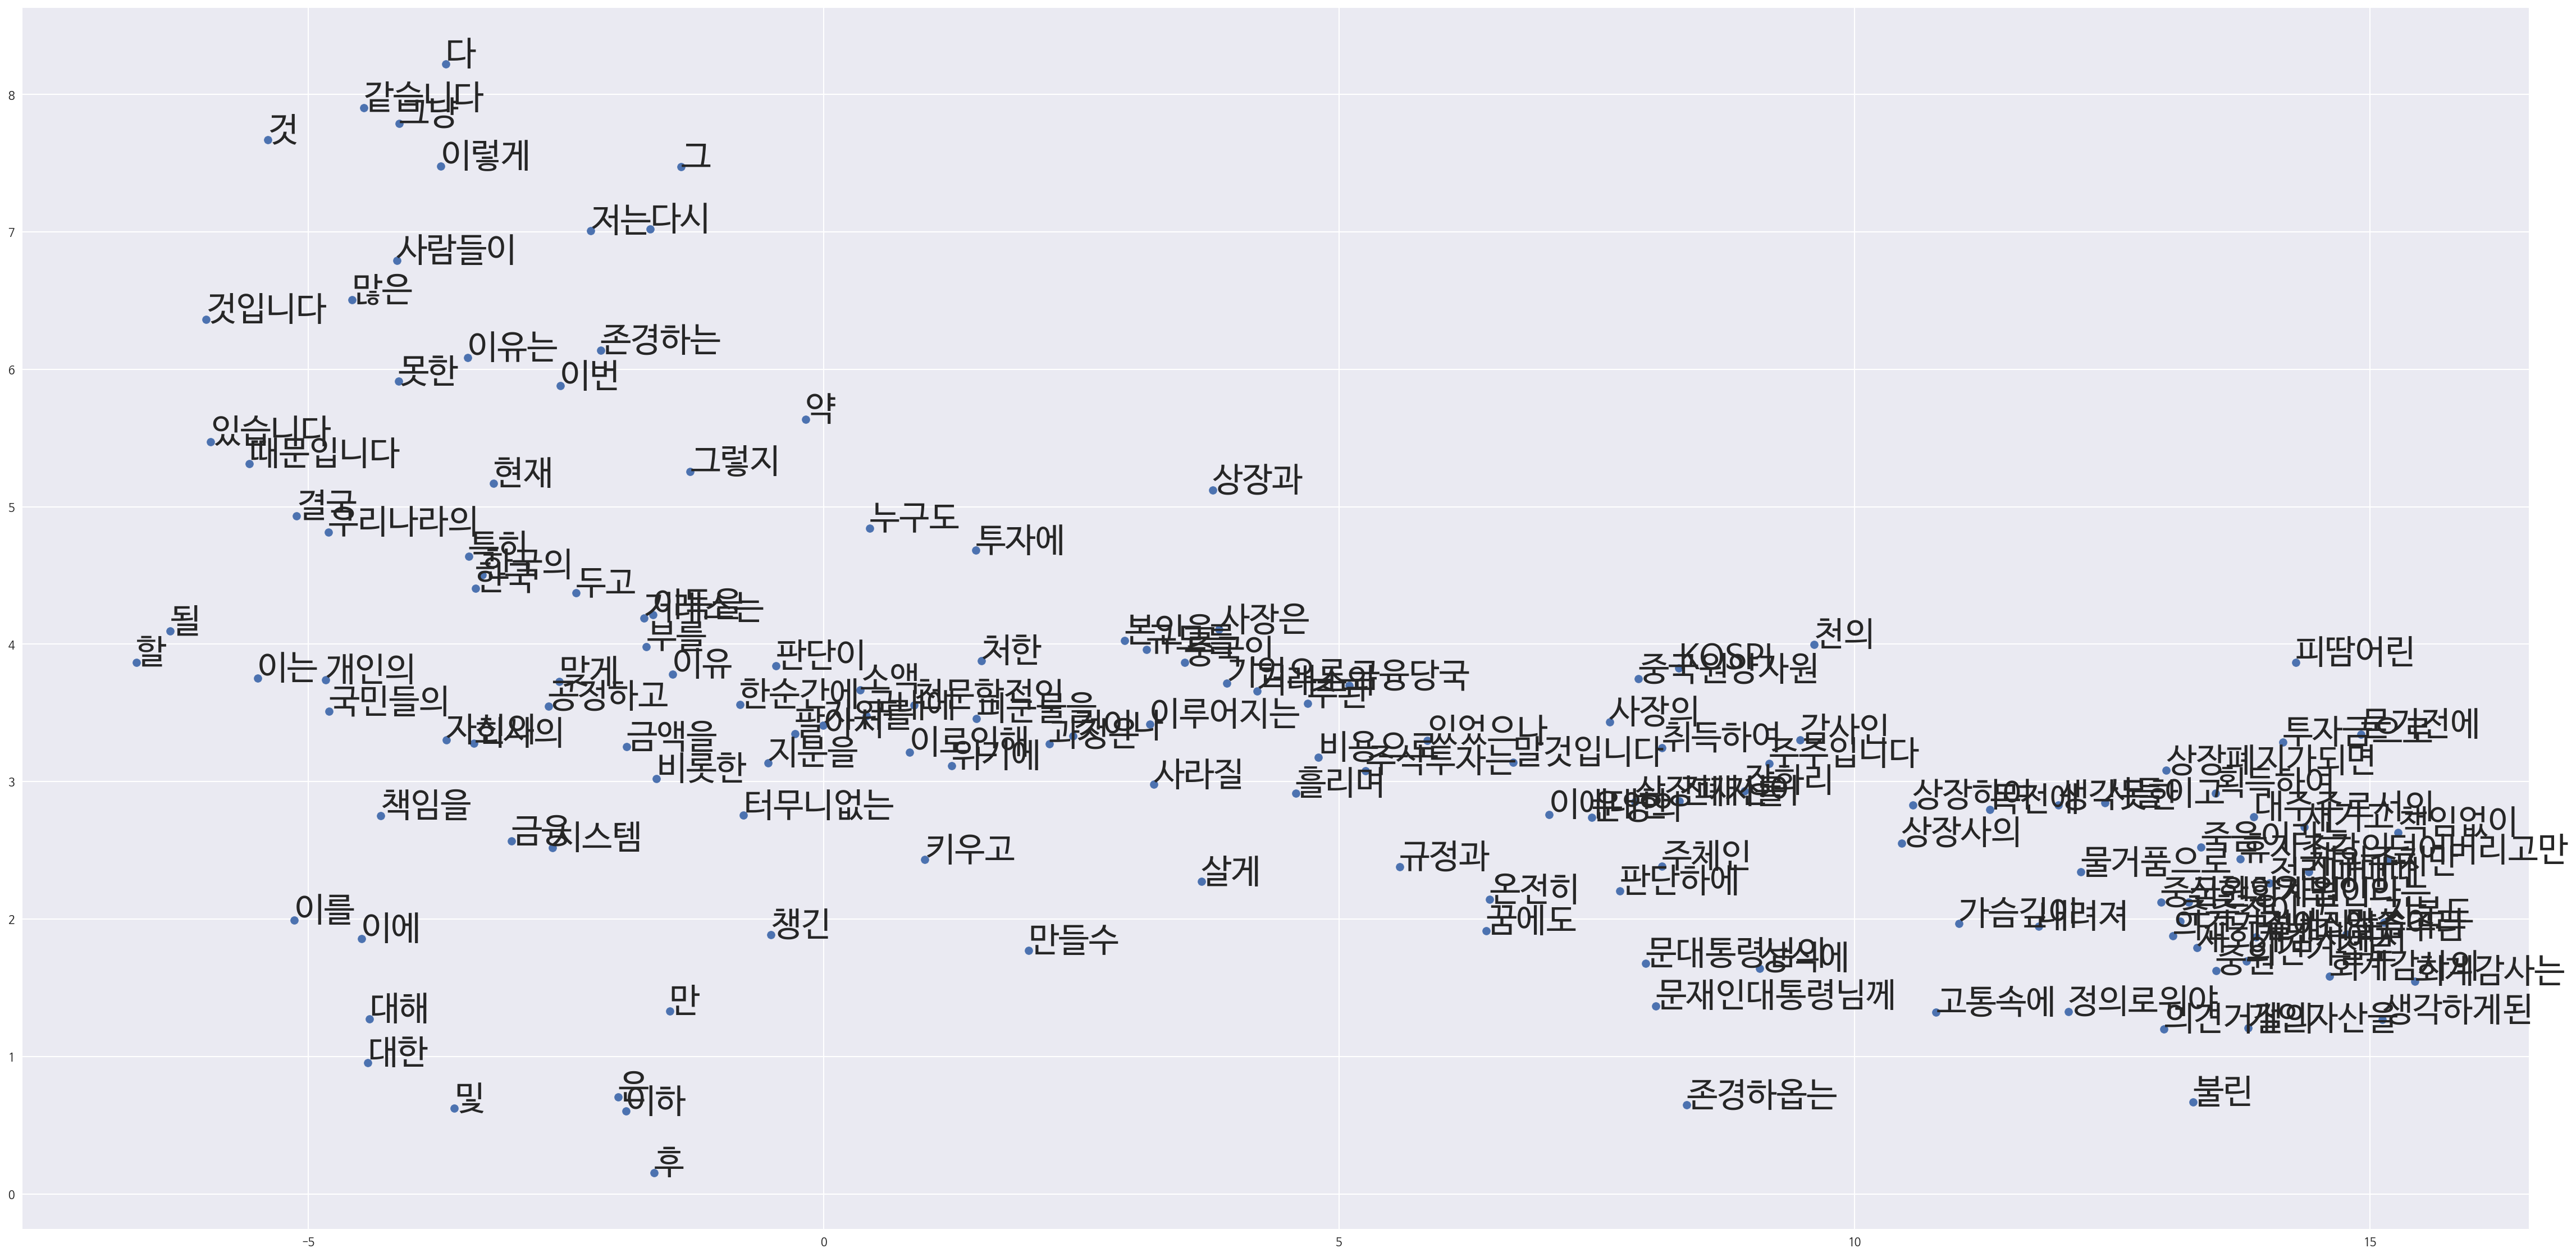

In [50]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()